In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

##### **Precios de lácteos**

Iniciamos analizando los precios de los productos lácteos (leche y queso) dado que son un producto de consumo masivo presente en todo el territorio nacional.

In [33]:
colores = {
    'Express': 'orange',
    'Market': 'red',
    'Hipermercado Carrefour': 'blue',
}
productos_df = pd.read_csv('productos_procesado.zip', sep='|')

# Al leer el csv las columnas vuelven a ser sus tipos nativos entonces las reconvertimon a categóricas
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['id_producto'] = productos_df['id_producto'].astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')
productos_df['comercio_bandera_nombre'] = productos_df['comercio_bandera_nombre'].astype('category')
productos_df['id_producto_code'] = productos_df['id_producto'].cat.codes

productos_df = productos_df[productos_df['productos_descripcion'].str.contains('^leche|^queso', case=False, na=False)]
display(productos_df.head())
display(productos_df.info())

,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,precio_zscore,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_localidad,sucursales_provincia,comercio_bandera_nombre,localidad_provincia,id_producto_code
10,16,7794990177523,True,QUESO EN HEBRAS ITALIANO LA PAULINA FP X 125 GRM,1.0,UNI,LA PAULINA,3255.0,26040.00,125.0,GRM,NaN,NaN,NaN,NaN,-7.351152e-01,1,Monte Grande,Hipermercado,-34.780839,-58.457944,NaN,Monte Grande,Buenos Aires,Hipermercado Carrefour,Monte Grande - Buenos Aires,10271
53,11,7791720028506,True,QUESO CREMA LIGHT CARREFOUR CLASSIC X 290 GRS,1.0,UNI,CARREFOUR CLASSIC,2590.0,8931.03,290.0,GRM,NaN,NaN,NaN,NaN,-1.818989e-12,1,Malvinas Argentinas,Hipermercado,-34.528883,-58.701631,NaN,Malvinas Argentinas,Buenos Aires,Hipermercado Carrefour,Malvinas Argentinas - Buenos Aires,7442
84,10,7794990878871,True,QUESO FUNDIDO FONTINA LA PAULINA POTE X 190 GRS,1.0,UNI,LA PAULINA,2389.0,12573.68,190.0,GRM,NaN,NaN,NaN,NaN,1.858175e-01,1,Villa Tesei,Hipermercado,-34.620610,-58.633769,NaN,Hurlingham,Buenos Aires,Hipermercado Carrefour,Hurlingham - Buenos Aires,10275
88,206,7798181641510,True,LECHE EN POLVO ADVANCED ETAPA 1 SANCOR BEBE X ...,1.0,UNI,SANCOR BEBE,30835.0,38543.75,800.0,GRM,NaN,NaN,NaN,NaN,-5.999348e-01,2,Barrio Norte,Hipermercado,-34.590140,-58.405533,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,12845
94,196,7798181641534,True,LECHE POLVO INF ET3 ADVAN SANCOR BEBE BRIK X80...,1.0,UNI,SANCOR BEBE,26290.0,32862.50,800.0,GRM,NaN,NaN,NaN,NaN,1.267008e+00,3,Corrientes 3651,Supermercado,-34.603633,-58.416192,Almagro,Ciudad Autónoma de Buenos Aires,CABA,Express,Ciudad Autónoma de Buenos Aires - CABA,12847


<class 'pandas.core.frame.DataFrame'>
Index: 37316 entries, 10 to 849210
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id_sucursal                           37316 non-null  category
 1   id_producto                           37316 non-null  category
 2   productos_ean                         37316 non-null  bool    
 3   productos_descripcion                 37316 non-null  object  
 4   productos_cantidad_presentacion       37316 non-null  float64 
 5   productos_unidad_medida_presentacion  37316 non-null  category
 6   productos_marca                       37316 non-null  category
 7   productos_precio_lista                37316 non-null  float64 
 8   productos_precio_referencia           37316 non-null  float64 
 9   productos_cantidad_referencia         37316 non-null  float64 
 10  productos_unidad_medida_referencia    37316 non-null  category
 11  produ

None

In [34]:
productos_df["id_producto"].nunique()

551

In [35]:
productos_df["id_producto"].value_counts().loc[lambda x: x > 0]

id_producto
7798060853034    126
7790742373304    126
7790742363008    126
7790742363107    126
7798179070728    126
                ... 
7790742448101      1
5701215935266      1
2509027000003      1
2509880000004      1
7798096210023      1
Name: count, Length: 551, dtype: int64

De la última celda podemos analizar que hay productos que estan en todos los tipos de comercio y otros que no.

Para tener un análisis acorde tomamos aquellos productos de bebidas no alcóholicas que están en los tres tipos de comercios.

In [36]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df[productos_df['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 167


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_48013/3562760019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()


### **Análisis de Outliers**

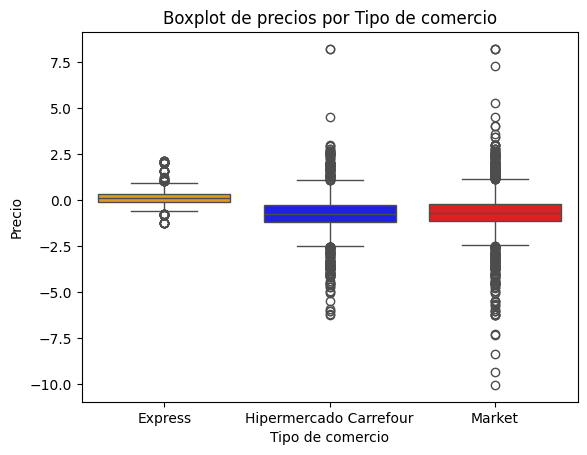

In [37]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [38]:
def remove_outliers_iqr(group):
    Q1 = group['precio_zscore'].quantile(0.25)
    Q3 = group['precio_zscore'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['precio_zscore'] >= lower) & (group['precio_zscore'] <= upper)]

# Aplica la función por categoría
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_48013/1922502756.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_48013/1922502756.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', 

Volvemos a filtrar los productos que están en los 3 tipos de comercio ya que al eliminar outliers se pudo producir que algún producto no esté en todos estos tipos.

In [39]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales[productos_df_en_varias_sucursales['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 156


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_48013/1613971439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()


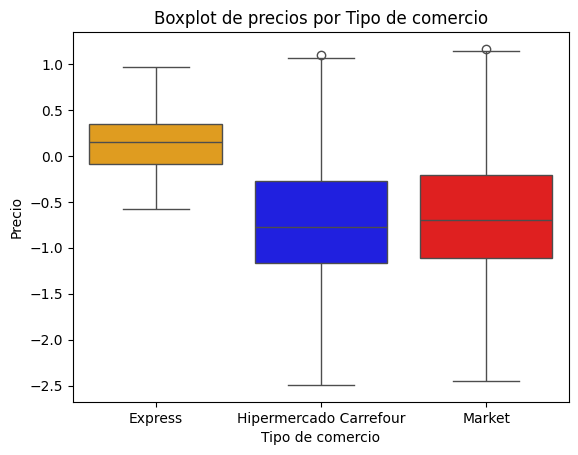

In [40]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

### **Análisis de precios máximos y mínimos**

Analizamos el precio máximo y mínimo de cada producto agrupado por el tipo de comercio.

In [41]:
print("Cantidad de registros para cada tipo de comercio:")
print(productos_df_en_varias_sucursales['comercio_bandera_nombre'].value_counts())

# Agrupar por id_producto y comercio_bandera_nombre y calcular el máximo y mínimo de precio_zscore
resultado = productos_df_en_varias_sucursales.groupby(['id_producto_code', 'comercio_bandera_nombre'])['precio_zscore'].agg(['max', 'min']).reset_index()

resultado.head()

Cantidad de registros para cada tipo de comercio:
comercio_bandera_nombre
Market                    7352
Hipermercado Carrefour    6131
Express                   3309
Name: count, dtype: int64


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_48013/2361889854.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = productos_df_en_varias_sucursales.groupby(['id_producto_code', 'comercio_bandera_nombre'])['precio_zscore'].agg(['max', 'min']).reset_index()


,id_producto_code,comercio_bandera_nombre,max,min
0,861,Express,-0.037457,-0.037457
1,861,Hipermercado Carrefour,-0.307298,-1.654969
2,861,Market,-0.037457,-1.654969
3,862,Express,0.147873,0.147873
4,862,Hipermercado Carrefour,-0.030384,-0.918161


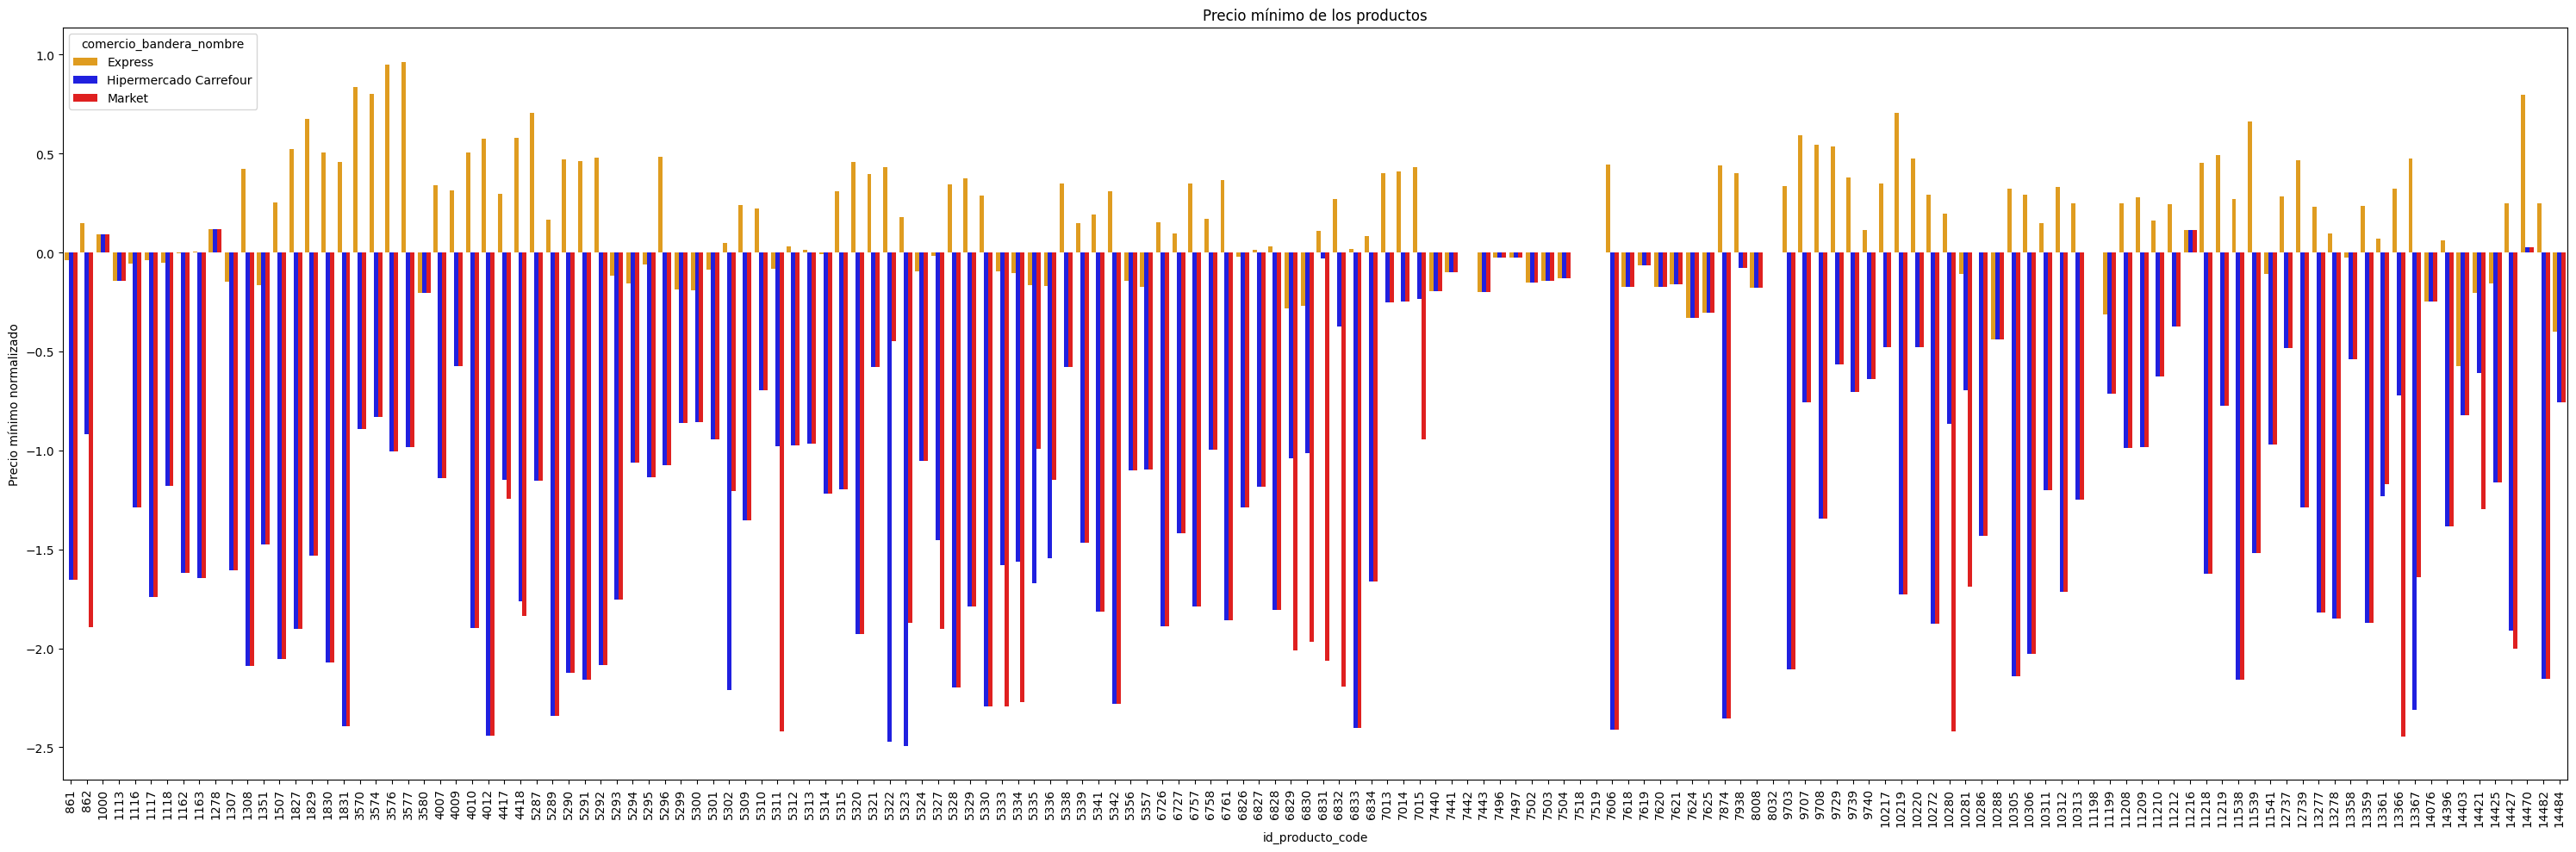

In [42]:
plt.figure(figsize=(30, 10))
sns.barplot(data=resultado, y='min', x='id_producto_code', hue='comercio_bandera_nombre', palette=colores)

plt.xticks(rotation=90)
plt.title("Precio mínimo de los productos")
plt.ylabel('Precio mínimo normalizado')
plt.tight_layout()
plt.show()

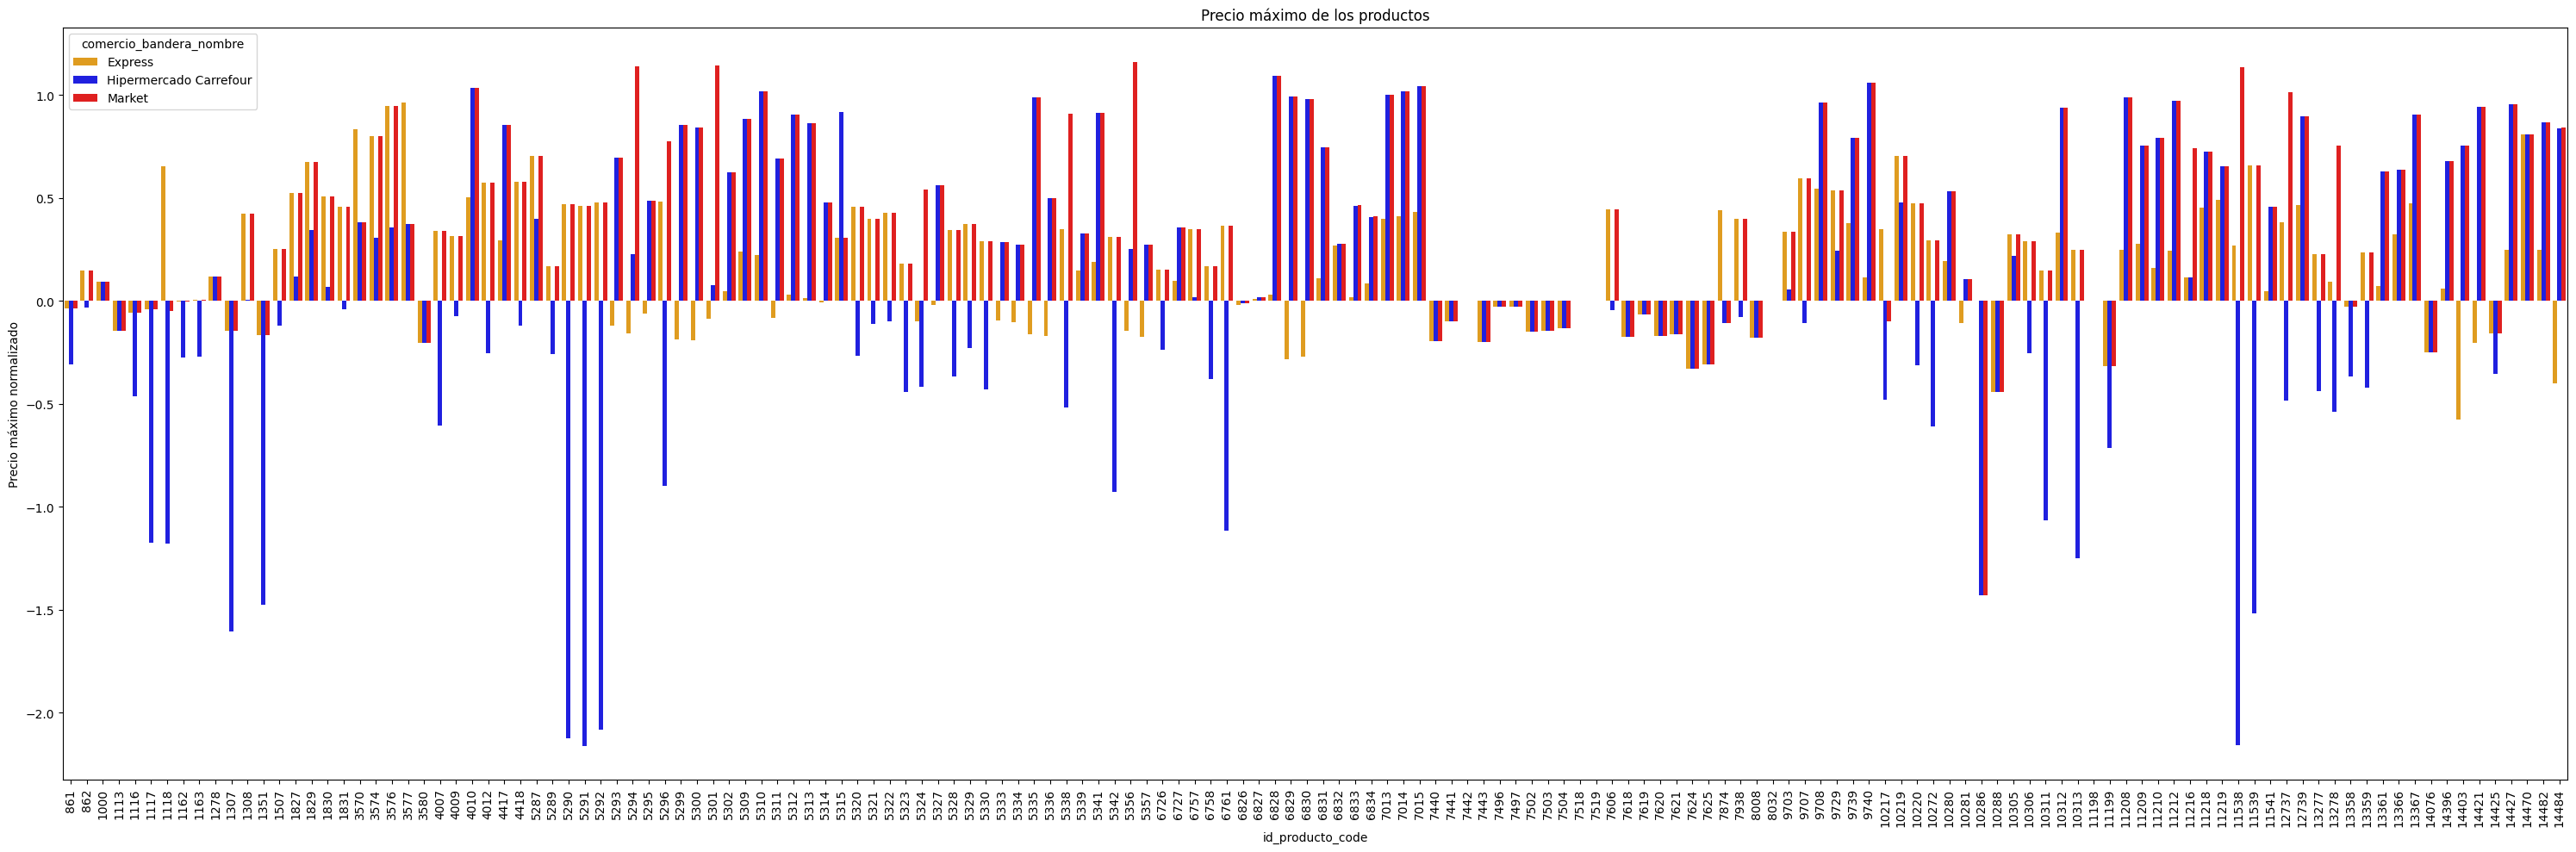

In [43]:
plt.figure(figsize=(30, 10))
sns.barplot(data=resultado, y='max', x='id_producto_code', hue='comercio_bandera_nombre', palette=colores)

plt.xticks(rotation=90)
plt.title("Precio máximo de los productos")
plt.ylabel('Precio máximo normalizado')
plt.tight_layout()
plt.show()

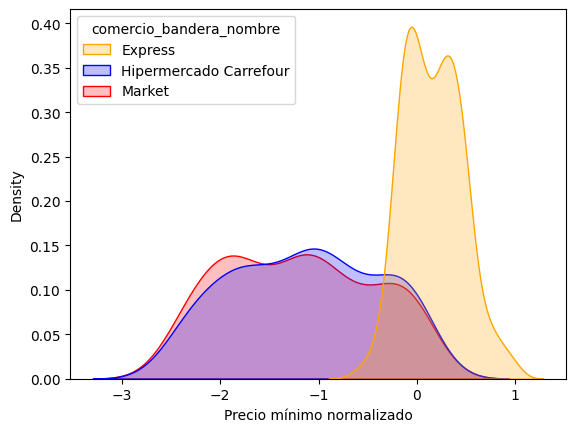

In [44]:
sns.kdeplot(data=resultado, x='min', hue='comercio_bandera_nombre', fill=True, palette=colores)
plt.xlabel('Precio mínimo normalizado')
plt.show()

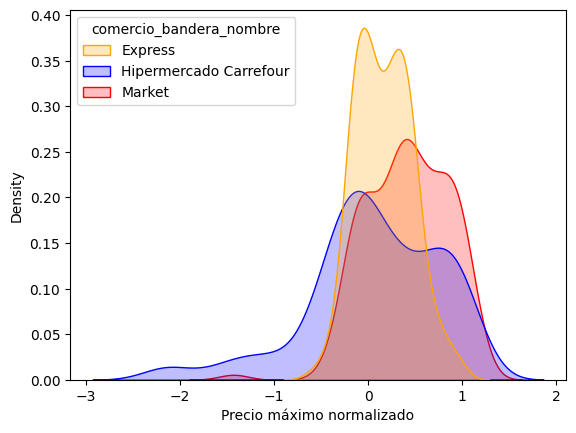

In [45]:
sns.kdeplot(data=resultado, x='max', hue='comercio_bandera_nombre', fill=True, palette=colores)
plt.xlabel('Precio máximo normalizado')
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_48013/1158149480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre')['precio_zscore'].mean().sort_values()


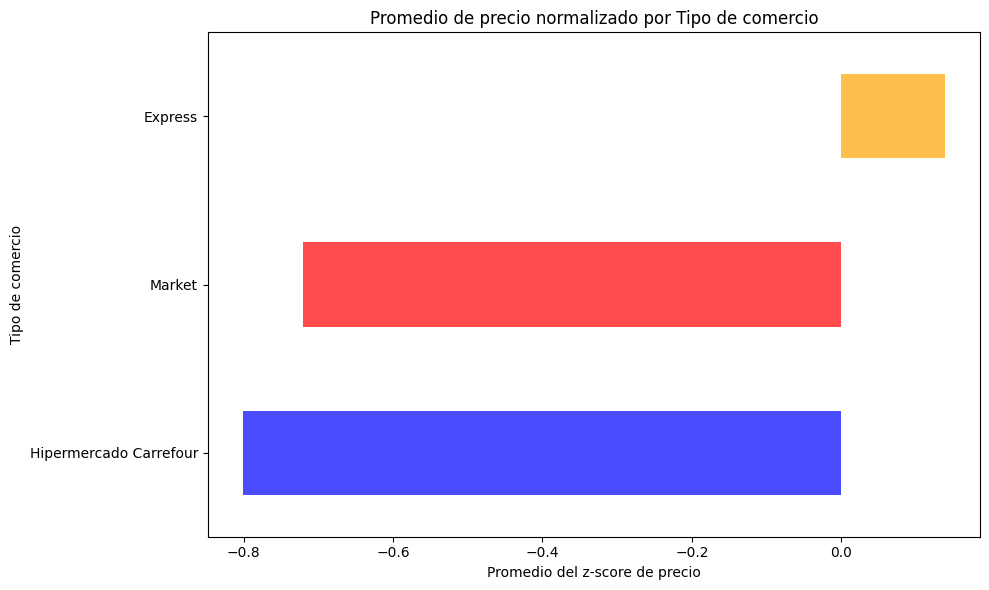

In [46]:
promedios = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre')['precio_zscore'].mean().sort_values()
# Hacer el gráfico de barras
colores_barras = [colores[nombre] for nombre in promedios.index]
promedios.plot(kind='barh', color=colores_barras, figsize=(10, 6), alpha=0.7)
plt.xlabel('Promedio del z-score de precio')
plt.ylabel('Tipo de comercio')
plt.title('Promedio de precio normalizado por Tipo de comercio')
plt.tight_layout()
plt.show()

Analizando los gráficos anteriores se puede concluir que los precios más bajos se encuentran en el tipo de comercio Hipermercado Carrefour. En cambio los más altos se encuentran en el tipo de comercio Express.